# Support Vector Machines - SVR() Scikit-Learn - Regression

### Mathieu VANDECASTEELE - mathieuvdc.com

In [1]:
# Useful Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

In [2]:
# Loading the Data and optional pre-processing. You need to have your X and your y. It is recommended to process some descriptive statistics before training.
# X =
# y =
print("Shape of X is "+str(X.shape))
print("Shape of y is "+str(y.shape))

Shape of X is (506, 13)
Shape of y is (506,)


In [3]:
# Split the Data
test_size = 0.20
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print("Spliting...")
print("Test ratio : "+str(test_size))
print("\nShape of Train dataset is "+str(X_train.shape))
print("Shape of Test dataset is "+str(X_test.shape))

Spliting...
Test ratio : 0.2

Shape of Train dataset is (404, 13)
Shape of Test dataset is (102, 13)


In [4]:
# Standardization
# Set to True or False to standardize the data.
standardize = True

if standardize :
    print("\nStandardization ...")
    scaler = StandardScaler().fit(X_train)                                
    X_train = scaler.transform(X_train)                           
    X_test = scaler.transform(X_test)       


Standardization ...



Perform First Simple Training...

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Done ! Time for training : 0.02687215805053711 seconds.

Precision/Score on Test Dataset : 0.649976605976003

Regression Metrics :

Explained variance : 0.6601164029539932
Mean Absolute Error : 2.731716176155842
Mean Squared Error : 25.66853967839608
Mean Squared Log Error : 0.04509098613864405
Median Absolute Error : 1.412195827673787
R2 Score : 0.649976605976003


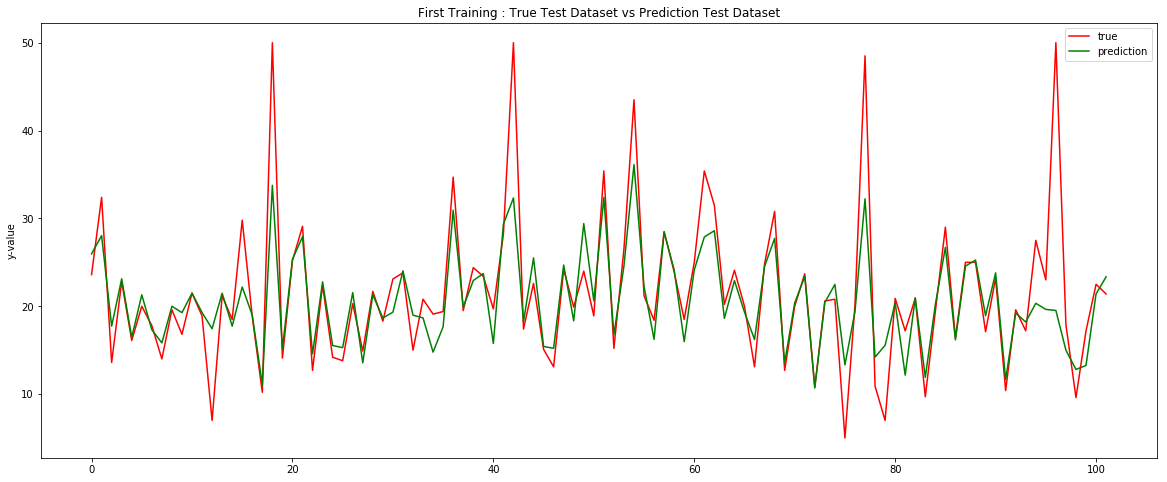

In [5]:
# First Simple Training

print("\nPerform First Simple Training...\n")
svr = SVR(gamma="scale")
print(svr)

time1 = time.time()
svr.fit(X_train, y_train)
elapsed = time.time() - time1
print("\nDone ! Time for training : "+str(elapsed)+" seconds.\n") 

# Simple Training Report
score = svr.score(X_test, y_test)
print("Precision/Score on Test Dataset : "+str(score)+"\n")

y_pred = svr.predict(X_test)
print("Regression Metrics :\n")
print("Explained variance : "+str(explained_variance_score(y_test, y_pred)))
print("Mean Absolute Error : "+str(mean_absolute_error(y_test, y_pred)))
print("Mean Squared Error : "+str(mean_squared_error(y_test, y_pred)))
print("Mean Squared Log Error : "+str(mean_squared_log_error(y_test, y_pred)))
print("Median Absolute Error : "+str(median_absolute_error(y_test, y_pred)))
print("R2 Score : "+str(r2_score(y_test, y_pred)))

plt.figure(figsize=(20,8))
plt.plot(y_test, c="r",label='true')
plt.plot(y_pred,c='g',label='prediction')
plt.ylabel('y-value')
plt.title('First Training : True Test Dataset vs Prediction Test Dataset')
plt.legend()

In [6]:
# Tuning parameters with GridSearch and Cross-Validation 

print("Perform GridSearchCV and tuning parameters... \n")

# Personalization of the parameters : 
parameters = {'kernel':('rbf','linear'), 'C':[0.1,1,2,10,50,100,150,160,170,180,190,200], 'epsilon':[0.01,0.1,0.15,0.17,0.18,0.2,0.5,1,2]}
cv_number = 5
# Set to -1 for using all the processors.
njobs = -1

svr = SVR(gamma="scale")
gs = GridSearchCV(svr, parameters, cv=cv_number, n_jobs=njobs, return_train_score=True)
print(gs)

time2 = time.time()
gs.fit(X_train,y_train)
elapsed2 = time.time() - time2
print("\nDone ! Time elapsed for tuning parameters : "+str(elapsed2)+" seconds.\n") 


# GridSearchCV Report

print("Best validation score : "+str(gs.best_score_))

print("\nBest parameters : ")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

score = gs.score(X_test, y_test)
print("\nPrecision/Score on Test Dataset : "+str(score)+"\n")

y_pred = gs.predict(X_test)
print("Regression Metrics :\n")
print("Explained variance : "+str(explained_variance_score(y_test, y_pred)))
print("Mean Absolute Error : "+str(mean_absolute_error(y_test, y_pred)))
print("Mean Squared Error : "+str(mean_squared_error(y_test, y_pred)))
print("Mean Squared Log Error : "+str(mean_squared_log_error(y_test, y_pred)))
print("Median Absolute Error : "+str(median_absolute_error(y_test, y_pred)))
print("R2 Score : "+str(r2_score(y_test, y_pred)))

print("\nAverage training time for one model :") 
print(str(np.mean(gs.cv_results_['mean_fit_time']))+" seconds.")


# All results ("Set to True to see all results forom GridSearchCV")
display_gridsearch_details = False

if display_gridsearch_details :
    print('All results :')
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print('')

Perform GridSearchCV and tuning parameters... 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ('rbf', 'linear'), 'C': [0.1, 1, 2, 10, 50, 100, 150, 160, 170, 180, 190, 200], 'epsilon': [0.01, 0.1, 0.15, 0.17, 0.18, 0.2, 0.5, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Done ! Time elapsed for tuning parameters : 62.44617795944214 seconds.

Best validation score : 0.8915096662367763

Best parameters : 
	C: 170
	epsilon: 0.5
	kernel: 'rbf'

Precision/Score on Test Dataset : 0.8273722712704402

Regression Metrics :

Explained variance : 0.8274680657631062
Mean Absolute Error : 2.150030040885136
Mean Squared Error : 12.65944442611259
Mean Squared Log Error : 0.024768731620185853
Medi

Perform Last Final Training...

SVR(C=170, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Done ! Time for training : 0.06406092643737793 seconds.

Validation score calculated previously for this model : 0.8915096662367763
Precision/Score on Test Dataset : 0.8273722712704402

Regression Metrics :

Explained variance : 0.8274680657631062
Mean Absolute Error : 2.150030040885136
Mean Squared Error : 12.65944442611259
Mean Squared Log Error : 0.024768731620185853
Median Absolute Error : 1.4183877009335735
R2 Score : 0.8273722712704402


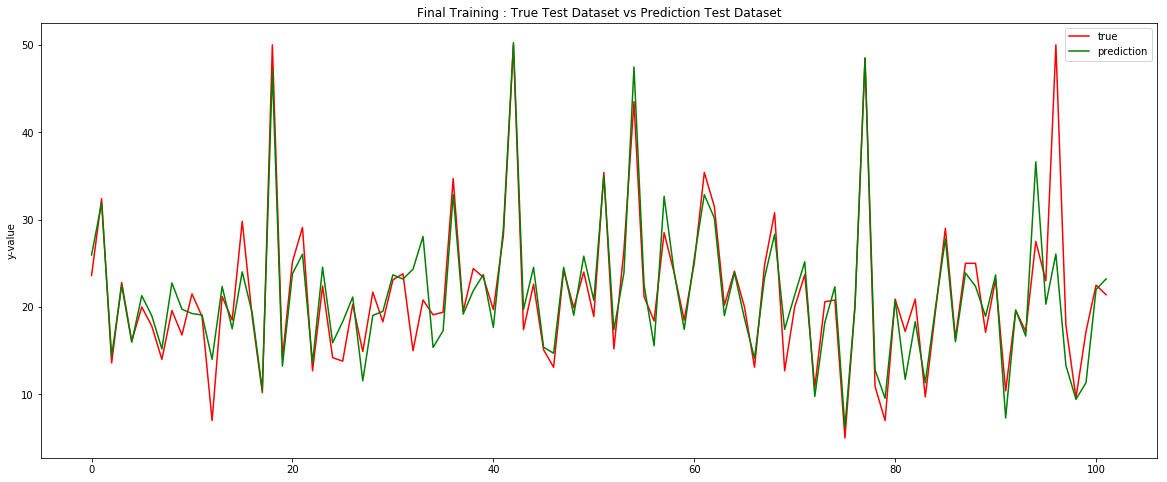

In [8]:
# Last Final Training

print("Perform Last Final Training...\n")

# For parameters you can directly unpack the best params dictionary of the GridSearchCV classifier or write it manually.
svr = SVR(gamma='scale', **gs.best_params_)
print(svr)

time3 = time.time()
svr.fit(X_train, y_train)
elapsed3 = time.time() - time3
print("Done ! Time for training : "+str(elapsed3)+" seconds.\n") 

# Last Training Report
score = svr.score(X_test, y_test)
print("Validation score calculated previously for this model : "+str(gs.best_score_))
print("Precision/Score on Test Dataset : "+str(score)+"\n")

y_pred = svr.predict(X_test)
print("Regression Metrics :\n")
print("Explained variance : "+str(explained_variance_score(y_test, y_pred)))
print("Mean Absolute Error : "+str(mean_absolute_error(y_test, y_pred)))
print("Mean Squared Error : "+str(mean_squared_error(y_test, y_pred)))
print("Mean Squared Log Error : "+str(mean_squared_log_error(y_test, y_pred)))
print("Median Absolute Error : "+str(median_absolute_error(y_test, y_pred)))
print("R2 Score : "+str(r2_score(y_test, y_pred)))

plt.figure(figsize=(20,8))
plt.plot(y_test, c="r",label='true')
plt.plot(y_pred,c='g',label='prediction')
plt.ylabel('y-value')
plt.title('Final Training : True Test Dataset vs Prediction Test Dataset')
plt.legend()

Finished !

You can use the gridsearch to plot curves if you want...